In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:

df_minTemp_UK = pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmin/date/UK.txt", delim_whitespace=True, skiprows=5)
df_maxTemp_UK = pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt", delim_whitespace=True, skiprows=5)
df_meanTemp_UK =pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt", delim_whitespace=True, skiprows=5)

df_minTemp_NI = pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmin/date/Northern_Ireland.txt", delim_whitespace=True, skiprows=5)
df_maxTemp_NI = pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt", delim_whitespace=True, skiprows=5)




In [3]:
df_meanTemp_UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    141 non-null    int64  
 1   jan     141 non-null    float64
 2   feb     141 non-null    float64
 3   mar     141 non-null    float64
 4   apr     141 non-null    float64
 5   may     141 non-null    float64
 6   jun     140 non-null    float64
 7   jul     140 non-null    float64
 8   aug     140 non-null    float64
 9   sep     140 non-null    float64
 10  oct     140 non-null    float64
 11  nov     140 non-null    float64
 12  dec     140 non-null    float64
 13  win     140 non-null    object 
 14  spr     140 non-null    float64
 15  sum     140 non-null    float64
 16  aut     140 non-null    float64
 17  ann     140 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 20.0+ KB


In [4]:
df_meanTemp_UK

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,5.0,4.2,5.1,6.2,9.70,12.5,14.5,15.3,13.0,8.3,4.6,3.3,---,6.98,14.11,8.62,8.48
1,1885,2.0,4.2,3.5,6.6,7.60,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
2,1886,1.1,0.8,2.9,6.3,8.80,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
3,1887,2.1,3.5,3.3,5.4,8.70,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
4,1888,2.8,1.1,2.1,5.3,9.20,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2020,5.6,5.1,5.6,9.1,11.30,14.0,14.3,15.9,12.8,9.4,7.7,4.3,5.28,8.68,14.76,9.98,9.62
137,2021,2.2,4.1,6.4,5.7,9.10,14.2,16.6,15.0,14.7,10.9,7.0,5.3,3.51,7.07,15.28,10.84,9.28
138,2022,4.7,5.6,6.7,8.1,11.80,13.9,16.5,16.6,13.4,11.6,8.2,2.9,5.18,8.87,15.71,11.05,10.03
139,2023,4.4,5.8,5.7,7.8,11.60,15.8,14.9,15.3,15.2,10.8,6.3,5.8,4.31,8.36,15.35,10.76,9.97


In [5]:
df_meanTemp_UK = df_meanTemp_UK.drop(index=[df_meanTemp_UK.index[0], df_meanTemp_UK.index[-1]])

In [6]:
df_meanTemp_UK

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
1,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
2,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
3,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
4,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28
5,1889,3.0,2.2,3.8,6.0,11.4,14.0,13.6,13.4,11.5,7.6,6.1,3.1,3.21,7.10,13.66,8.41,8.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2019,3.4,6.0,6.8,8.4,10.0,13.2,16.4,15.8,13.1,8.9,5.3,5.1,5.05,8.38,15.14,9.10,9.39
136,2020,5.6,5.1,5.6,9.1,11.3,14.0,14.3,15.9,12.8,9.4,7.7,4.3,5.28,8.68,14.76,9.98,9.62
137,2021,2.2,4.1,6.4,5.7,9.1,14.2,16.6,15.0,14.7,10.9,7.0,5.3,3.51,7.07,15.28,10.84,9.28
138,2022,4.7,5.6,6.7,8.1,11.8,13.9,16.5,16.6,13.4,11.6,8.2,2.9,5.18,8.87,15.71,11.05,10.03


In [7]:
df_meanTemp_UK = df_meanTemp_UK.set_index('year')

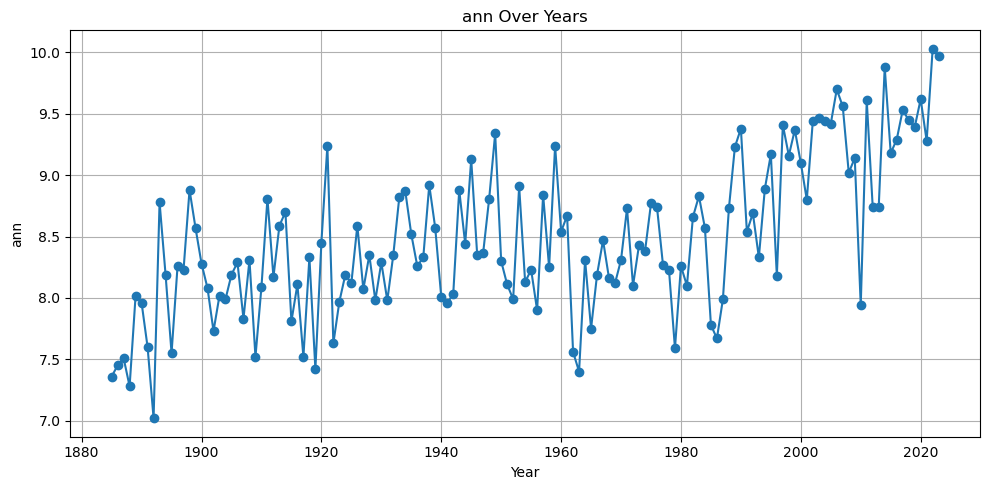

In [8]:
chosen_column_data = df_meanTemp_UK.iloc[:, -1]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df_meanTemp_UK.index, chosen_column_data, marker='o')
plt.title(f'{chosen_column_data.name} Over Years')
plt.xlabel('Year')
plt.ylabel(chosen_column_data.name)
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [9]:
df_maxTemp_UK=df_maxTemp_UK.drop(index=[df_maxTemp_UK.index[0], df_maxTemp_UK.index[-1]])

In [10]:
df_maxTemp_UK = df_maxTemp_UK.set_index('year')

In [11]:
df_maxTemp_UK

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1885,4.3,7.3,7.2,10.8,11.8,17.0,19.4,16.8,15.0,9.3,7.5,5.9,5.75,9.91,17.76,10.58,11.04
1886,3.7,3.4,6.1,10.5,13.1,16.4,18.7,18.5,16.0,12.9,8.6,4.1,4.36,9.88,17.87,12.51,11.04
1887,4.8,6.9,6.7,9.9,13.0,19.8,20.7,19.1,14.5,10.0,6.6,4.9,5.23,9.88,19.87,10.37,11.44
1888,5.5,3.7,5.2,9.0,14.1,16.3,16.0,16.9,15.4,11.4,8.9,7.1,4.74,9.41,16.38,11.91,10.81
1889,5.8,5.2,7.3,9.4,15.8,19.0,18.1,17.2,15.5,11.1,8.9,6.0,6.06,10.84,18.09,11.82,11.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,6.2,10.0,10.1,12.9,14.6,17.3,20.7,19.9,17.1,12.2,7.9,7.9,8.15,12.55,19.36,12.42,13.10
2020,8.3,8.0,9.3,14.2,16.7,18.3,18.3,19.9,17.1,12.4,10.7,6.8,8.06,13.41,18.84,13.39,13.35
2021,4.9,7.0,9.8,10.9,13.4,18.7,21.1,18.9,18.6,14.0,9.9,7.8,6.21,11.38,19.57,14.19,12.95


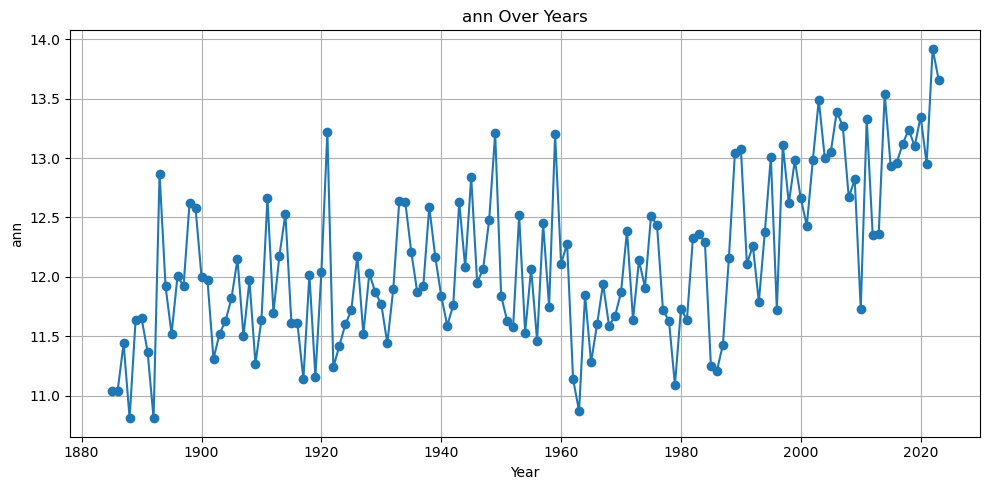

In [12]:
chosen_column_data = df_maxTemp_UK.iloc[:, -1]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df_maxTemp_UK.index, chosen_column_data, marker='o')
plt.title(f'{chosen_column_data.name} Over Years')
plt.xlabel('Year')
plt.ylabel(chosen_column_data.name)
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

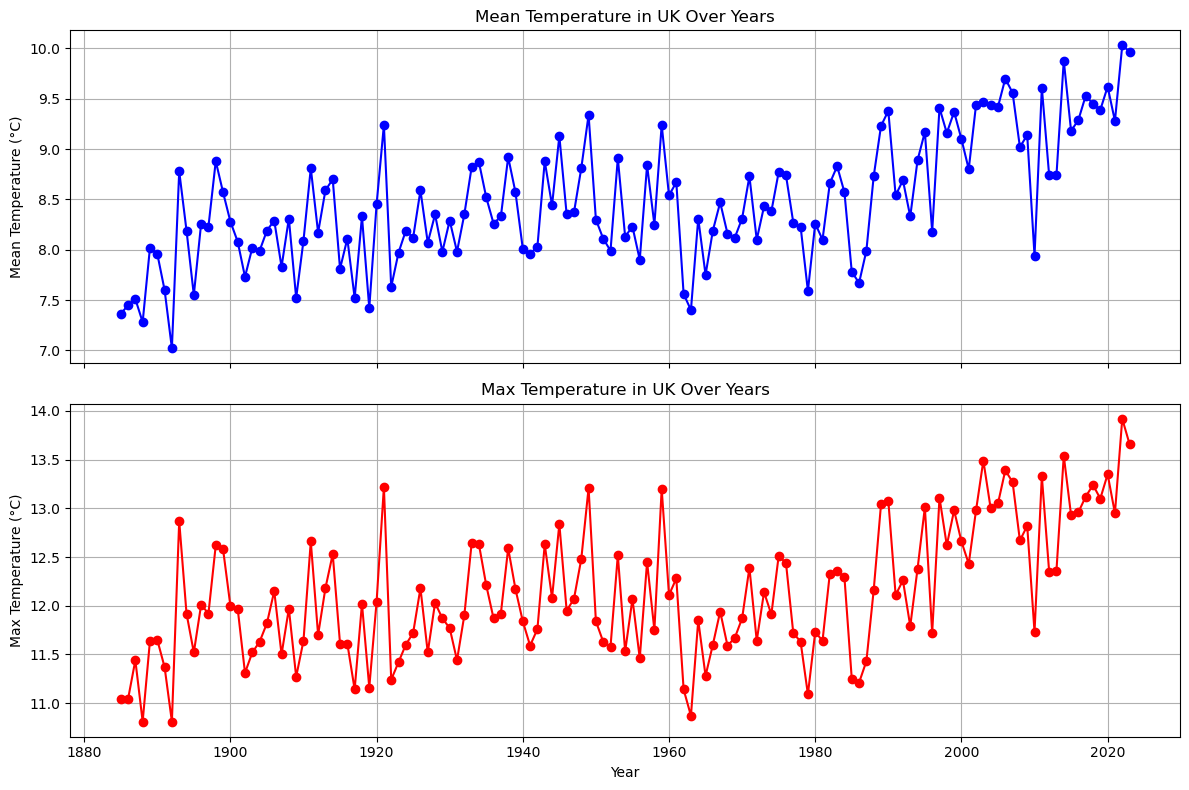

In [13]:
last_column_meantemp = df_meanTemp_UK.iloc[:, -1]
last_column_maxtemp = df_maxTemp_UK.iloc[:, -1]

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Mean Temperature data
ax[0].plot(last_column_meantemp.index, last_column_meantemp, marker='o', linestyle='-', color='b')
ax[0].set_title('Mean Temperature in UK Over Years')
ax[0].set_ylabel('Mean Temperature (°C)')
ax[0].grid(True)

# Plot Max Temperature data
ax[1].plot(last_column_maxtemp.index, last_column_maxtemp, marker='o', linestyle='-', color='r')
ax[1].set_title('Max Temperature in UK Over Years')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Max Temperature (°C)')
ax[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
correlation = last_column_meantemp.corr(last_column_maxtemp)
correlation

0.9790132873030013

In [48]:
def separate_and_fit(df1, df2, split_year=1960):

    # Split the data into two parts based on the split year
    df1_before_1960 = df1[df1.index < split_year]
    df1_after_1960 = df1[df1.index >= split_year]
    df2_before_1960 = df2[df2.index < split_year]
    df2_after_1960 = df2[df2.index >= split_year]
    
    # Extract the last columns
    last_column_df1_before = df1_before_1960.iloc[:, -1]
    last_column_df1_after = df1_after_1960.iloc[:, -1]
    last_column_df2_before = df2_before_1960.iloc[:, -1]
    last_column_df2_after = df2_after_1960.iloc[:, -1]
    
    # Function to fit a line of best fit
    def fit_line(x, y):
        x_reshape = x.values.reshape(-1, 1)  # Reshape for sklearn
        model = LinearRegression().fit(x_reshape, y.values)
        return model.predict(x_reshape), model.coef_[0], model.intercept_
    
    # Fit lines of best fit
    line1_before, coef1_before, intercept1_before = fit_line(last_column_df1_before.index, last_column_df1_before)
    line1_after, coef1_after, intercept1_after = fit_line(last_column_df1_after.index, last_column_df1_after)
    line2_before, coef2_before, intercept2_before = fit_line(last_column_df2_before.index, last_column_df2_before)
    line2_after, coef2_after, intercept2_after = fit_line(last_column_df2_after.index, last_column_df2_after)
    
    # Plot the data and lines of best fit
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot first DataFrame's last column with lines of best fit
    ax[0].scatter(last_column_df1_before.index, last_column_df1_before, color='b', label='Before 1960')
    ax[0].plot(last_column_df1_before.index, line1_before, color='b', linestyle='--', label=f'Best fit Before 1960')
    ax[0].scatter(last_column_df1_after.index, last_column_df1_after, color='r', label='After 1960')
    ax[0].plot(last_column_df1_after.index, line1_after, color='r', linestyle='--', label=f'Best fit After 1960')
    ax[0].set_title(f'{last_column_df1_before.name} Mean Over Years')
    ax[0].set_ylabel(last_column_df1_before.name)
    ax[0].legend()
    ax[0].grid(True)
    
    # Plot second DataFrame's last column with lines of best fit
    ax[1].scatter(last_column_df2_before.index, last_column_df2_before, color='b', label='Before 1960')
    ax[1].plot(last_column_df2_before.index, line2_before, color='b', linestyle='--', label=f'Best fit Before 1960')
    ax[1].scatter(last_column_df2_after.index, last_column_df2_after, color='r', label='After 1960')
    ax[1].plot(last_column_df2_after.index, line2_after, color='r', linestyle='--', label=f'Best fit After 1960')
    ax[1].set_title(f'{last_column_df2_before.name} Max Over Years')
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel(last_column_df2_before.name)
    ax[1].legend()
    ax[1].grid(True)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    fig.savefig("meantemp_uk_plot.png")
    

    return {
        'df1_before_1960': (coef1_before, intercept1_before),
        'df1_after_1960': (coef1_after, intercept1_after),
        'df2_before_1960': (coef2_before, intercept2_before),
        'df2_after_1960': (coef2_after, intercept2_after),
    }

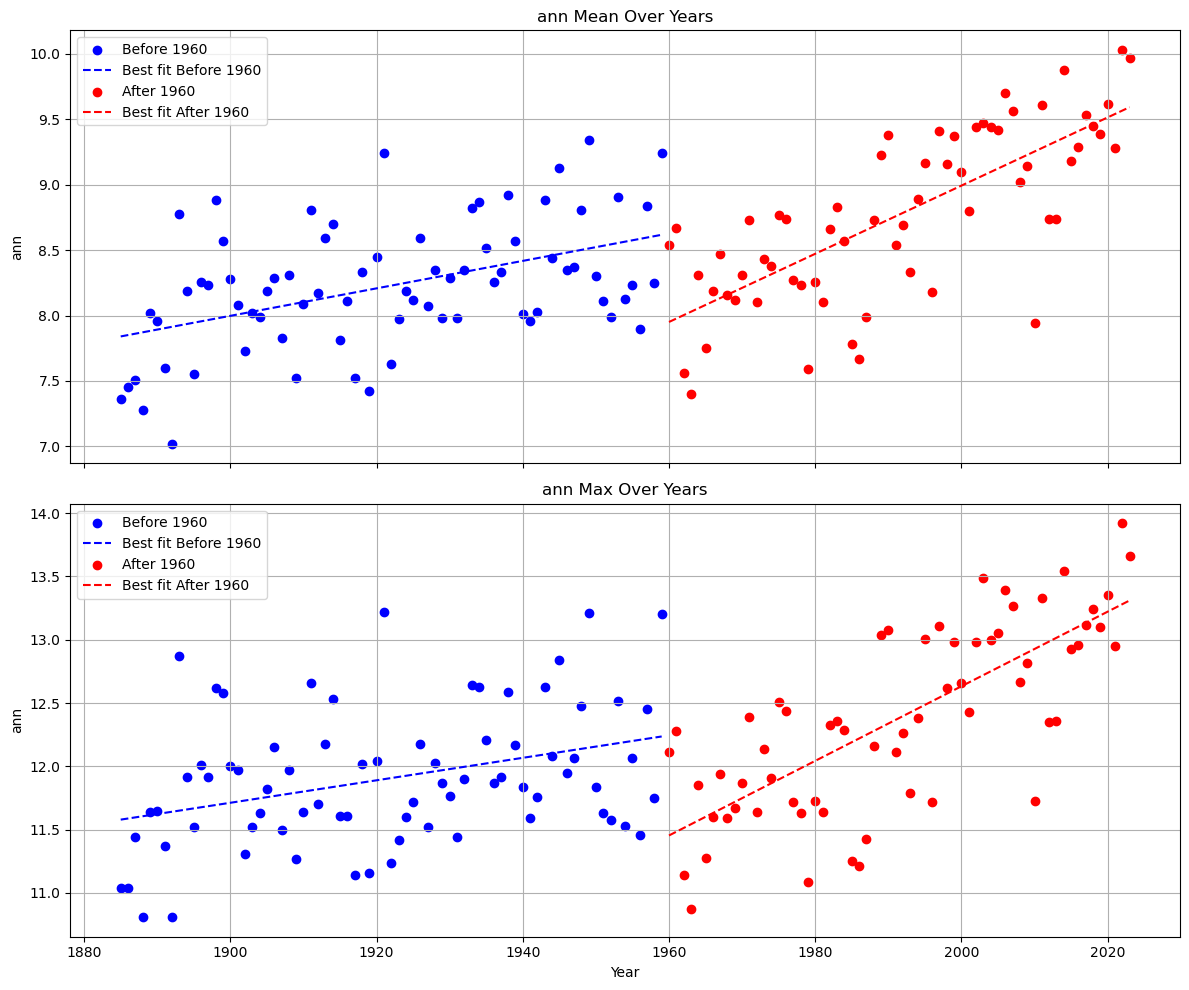

{'df1_before_1960': (0.010501280227596018, -11.954527264106217), 'df1_after_1960': (0.026062271062271065, -43.131137820512826), 'df2_before_1960': (0.00887539118065434, -5.150635182550973), 'df2_after_1960': (0.02946130952380954, -46.2898541666667)}


In [49]:
coefficients = separate_and_fit(df_meanTemp_UK, df_maxTemp_UK, split_year=1960)
print(coefficients)


In [56]:
def fit_and_plot(df1, df2):

    
    # Extract the last columns
    last_column_df1 = df1.iloc[:, -1]
    last_column_df2 = df2.iloc[:, -1]
    
    # Function to fit a line of best fit
    def fit_line(x, y):
        x_reshape = x.values.reshape(-1, 1)  # Reshape for sklearn
        model = LinearRegression().fit(x_reshape, y.values)
        return model.predict(x_reshape), model.coef_[0], model.intercept_
    
    # Fit lines of best fit for the entire dataset
    line1, coef1, intercept1 = fit_line(last_column_df1.index, last_column_df1)
    line2, coef2, intercept2 = fit_line(last_column_df2.index, last_column_df2)
    
    # Plot the data and lines of best fit
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot first DataFrame's last column with line of best fit
    ax[0].scatter(last_column_df1.index, last_column_df1, color='b', label='Data')
    ax[0].plot(last_column_df1.index, line1, color='r', linestyle='--', label=f'Best fit: y={coef1:.2f}x+{intercept1:.2f}')
    ax[0].set_title(f'{last_column_df1.name} Over Years')
    ax[0].set_ylabel(last_column_df1.name)
    ax[0].legend()
    ax[0].grid(True)
    
    # Plot second DataFrame's last column with line of best fit
    ax[1].scatter(last_column_df2.index, last_column_df2, color='b', label='Data')
    ax[1].plot(last_column_df2.index, line2, color='r', linestyle='--', label=f'Best fit: y={coef2:.2f}x+{intercept2:.2f}')
    ax[1].set_title(f'{last_column_df2.name} Over Years')
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel(last_column_df2.name)
    ax[1].legend()
    ax[1].grid(True)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    fig.savefig("mean_maxTemp_uk_line_plot.png")

    return {
        'df1': (coef1, intercept1),
        'df2': (coef2, intercept2),
    }


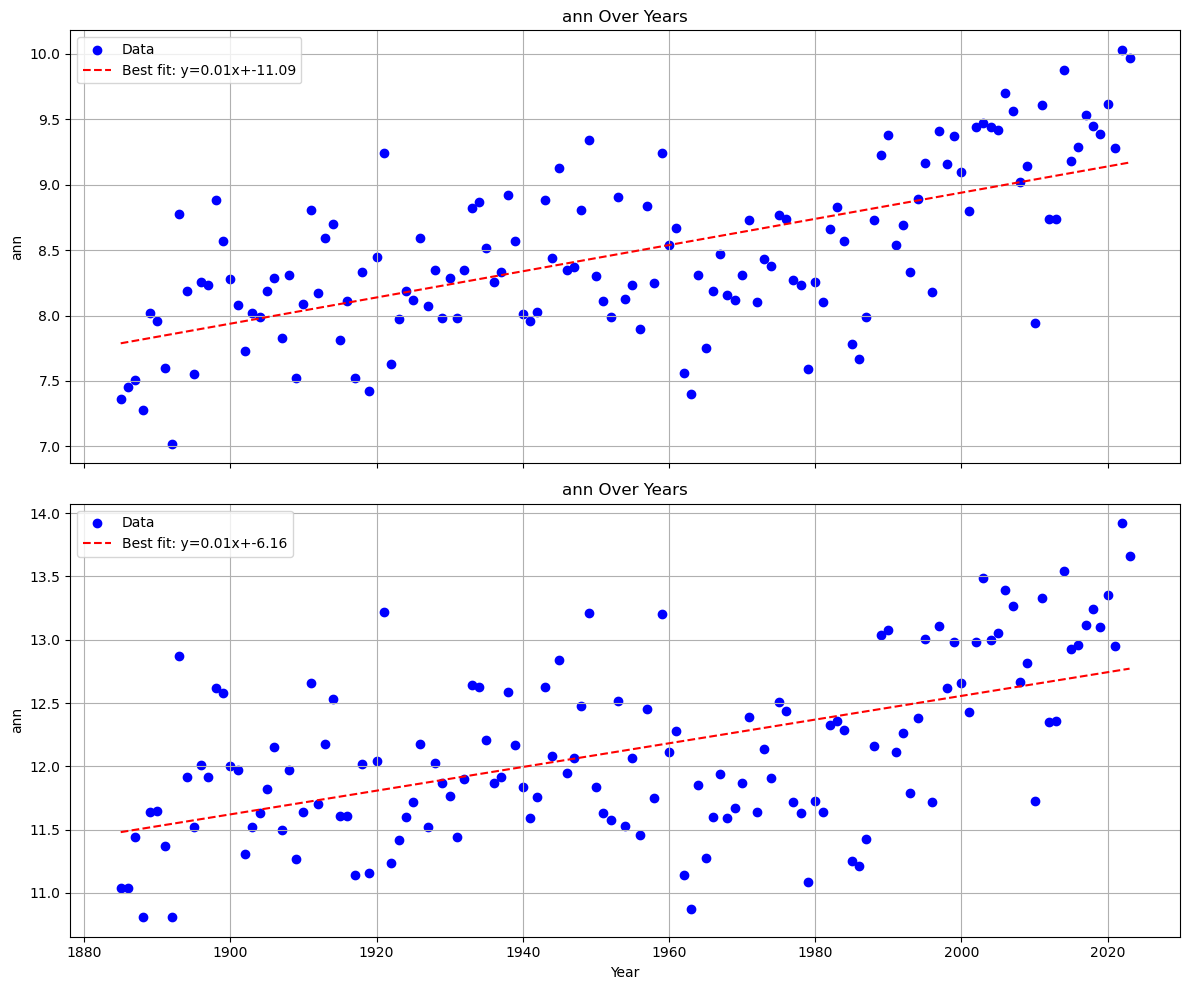

{'df1': (0.010015550292685109, -11.091464408597348), 'df2': (0.009357656731757452, -6.158530318602262)}


In [57]:
coefficients = fit_and_plot(df_meanTemp_UK, df_maxTemp_UK)
print(coefficients)